# Task 2.2 (Customer Purchasing Behaviors)
The Dataset from kaggle  https://www.kaggle.com/datasets/hanaksoy/customer-purchasing-behaviors/datav)

## Import Libraries

In [147]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

## Load Data

In [149]:
df = pd.read_csv('Customer Purchasing Behaviors.csv')
df

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13
...,...,...,...,...,...,...,...
233,234,40,60000,450,7.2,West,20
234,235,38,59000,430,6.9,North,20
235,236,54,74000,630,9.4,South,27
236,237,32,52000,360,5.8,West,18


## Data Exploration

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


In [152]:
df.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


## Data Encoding

In [154]:
df['region'].unique()

array(['North', 'South', 'West', 'East'], dtype=object)

In [155]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['region_encoded'] = label_encoder.fit_transform(df['region'])

# View the first few rows to see the encoded column
print(df[['region', 'region_encoded']].head())

  region  region_encoded
0  North               1
1  South               2
2   West               3
3   East               0
4  North               1


In [156]:
df = df.drop('region', axis=1)

In [157]:
df

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency,region_encoded
0,1,25,45000,200,4.5,12,1
1,2,34,55000,350,7.0,18,2
2,3,45,65000,500,8.0,22,3
3,4,22,30000,150,3.0,10,0
4,5,29,47000,220,4.8,13,1
...,...,...,...,...,...,...,...
233,234,40,60000,450,7.2,20,3
234,235,38,59000,430,6.9,20,1
235,236,54,74000,630,9.4,27,2
236,237,32,52000,360,5.8,18,3


## Data Visualization 

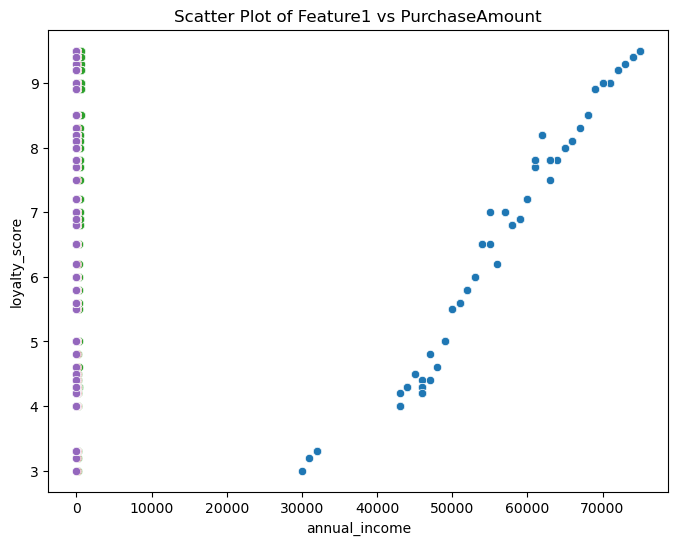

In [159]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['annual_income'], y=df['loyalty_score'])
sns.scatterplot(x=df['age'], y=df['loyalty_score'])
sns.scatterplot(x=df['purchase_amount'], y=df['loyalty_score'])
sns.scatterplot(x=df['purchase_frequency'], y=df['loyalty_score'])
sns.scatterplot(x=df['region_encoded'], y=df['loyalty_score'])
plt.title('Scatter Plot of Feature1 vs PurchaseAmount')
plt.show()

## Multi Linear Regression

### --> Split Features and Target

In [162]:
X = df.drop('loyalty_score', axis=1)
y = df['loyalty_score']

### --> Split data into Train and Test

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### --> Show Train Data and Test Data

In [166]:
X_train

,user_id,age,annual_income,purchase_amount,purchase_frequency,region_encoded
184,185,43,63000,470,21,2
224,225,52,72000,610,26,3
194,195,52,72000,610,26,3
95,96,41,61000,480,22,3
227,228,50,70000,600,25,3
...,...,...,...,...,...,...
106,107,41,61000,480,21,2
14,15,49,69000,590,24,3
92,93,51,71000,600,25,3
179,180,55,75000,640,28,3


In [167]:
X_test

,user_id,age,annual_income,purchase_amount,purchase_frequency,region_encoded
115,116,54,74000,630,27,2
15,16,23,31000,160,11,1
212,213,51,71000,600,25,3
126,127,50,70000,600,25,1
6,7,36,54000,400,19,3
170,171,49,69000,590,24,3
9,10,31,50000,320,17,2
222,223,46,66000,510,22,1
112,113,45,65000,500,22,2
221,222,37,58000,420,20,3


### --> Train the model

In [169]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### --> Print the Intercept and Coefficient for each column of the features

In [187]:
print(f"Intercept: {regressor.intercept_}")
print(f"Coefficient: {regressor.coef_}")
print(len(regressor.coef_))

Intercept: 0.6501135598763748
Coefficient: [-4.21861074e-04  4.93403850e-03  3.59552892e-05  1.26180882e-02
 -7.36388623e-02  1.63710354e-02]
6


### --> Predict on the Test Data

In [189]:
y_pred = regressor.predict(X_test)
# Comparing actual vs predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

     Actual  Predicted
115     9.4   9.522196
15      3.2   3.096698
212     9.0   9.143713
126     9.0   9.106362
6       6.5   6.463582
170     8.9   9.027111
9       5.5   5.415284
222     8.1   7.987594
112     8.0   7.883300
221     6.8   6.700360
183     4.0   4.139375
137     9.0   9.134463
30      6.5   5.815898
190     7.0   6.849702
113     7.2   7.211176
55      9.4   9.547507
24      6.9   6.901423
204     6.9   6.841859
86      5.8   5.907101
19      4.3   4.349391
207     5.6   5.603702
120     4.3   4.714771
141     4.3   4.314295
235     9.4   9.471572
10      4.4   4.536622
219     5.0   5.090710
173     7.2   7.185864
109     3.3   3.240485
75      4.2   4.550098
25      8.3   8.323055
124     7.8   7.491555
186     9.0   9.081050
180     4.3   4.689459
18      8.1   8.073654
68      8.5   8.524528
60      4.3   4.740082
148     8.2   7.924168
205     9.4   9.484228
114     6.9   6.879827
73      6.0   6.189466
82      8.0   7.895956
45      4.4   4.298739
16      7.0

### --> Evaluate the model

In [193]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.1334072177240149
Mean Squared Error (MSE): 0.03505672391899041
Root Mean Squared Error (RMSE): 0.18723440901445015
R² Score: 0.9915184989111436


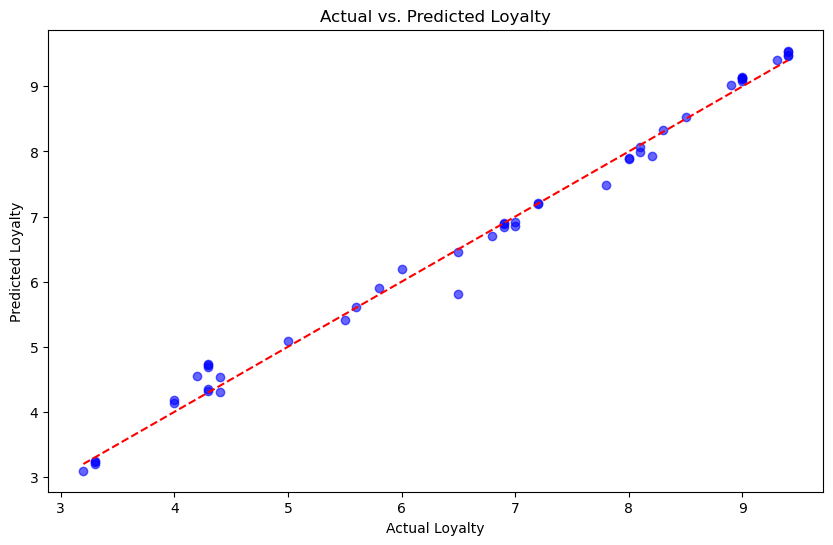

In [195]:
# Plotting Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Loyalty')
plt.ylabel('Predicted Loyalty')
plt.title('Actual vs. Predicted Loyalty')
plt.show()

### --> Use the model

In [204]:
Loyalty = regressor.predict([[104,50,10000, 200 ,12 , 0]])
Loyalty

D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.85244612])